# About dataset

https://www.kaggle.com/datasets/yasserh/wine-quality-dataset

This datasets is related to red variants of the Portuguese "Vinho Verde" wine.The dataset describes the amount of various chemicals present in wine and their effect on it's quality. The datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).Your task is to predict the quality of wine using the given data.

A simple yet challenging project, to anticipate the quality of wine.
The complexity arises due to the fact that the dataset has fewer samples, & is highly imbalanced.
Can you overcome these obstacles & build a good predictive model to classify them?

This data frame contains the following columns:

Input variables (based on physicochemical tests):\
1 - fixed acidity\
2 - volatile acidity\
3 - citric acid\
4 - residual sugar\
5 - chlorides\
6 - free sulfur dioxide\
7 - total sulfur dioxide\
8 - density\
9 - pH\
10 - sulphates\
11 - alcohol\
Output variable (based on sensory data):\
12 - quality (score between 0 and 10)

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

In [80]:
df = pd.read_csv('WineQT.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [81]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [82]:
df.drop('Id', axis=1, inplace=True)

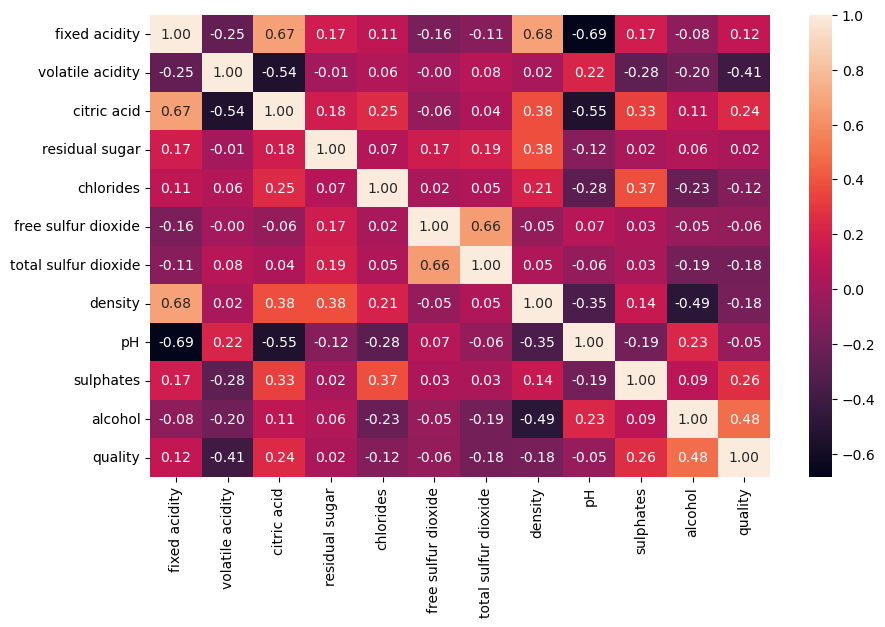

In [83]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, fmt='.2f');

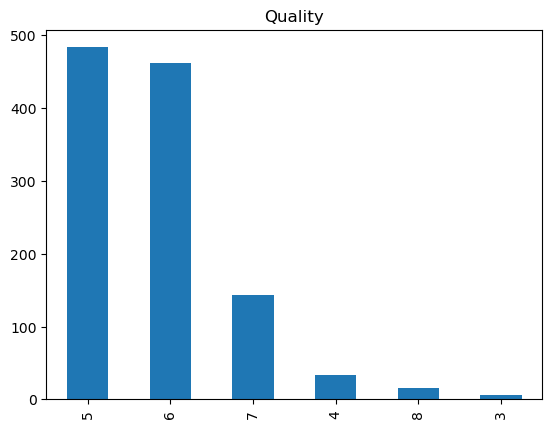

In [84]:
df['quality'].value_counts().plot(kind='bar', title='Quality');

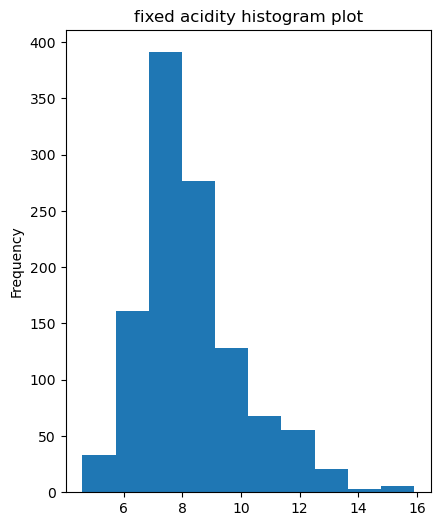

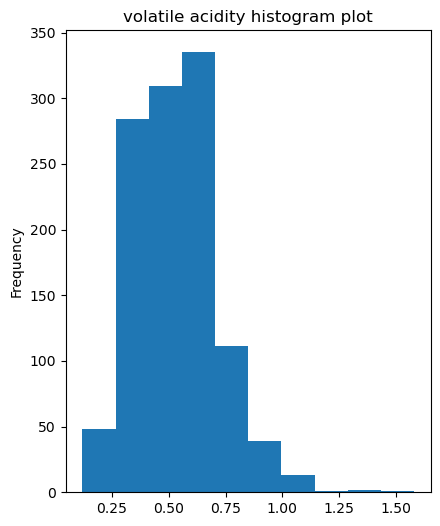

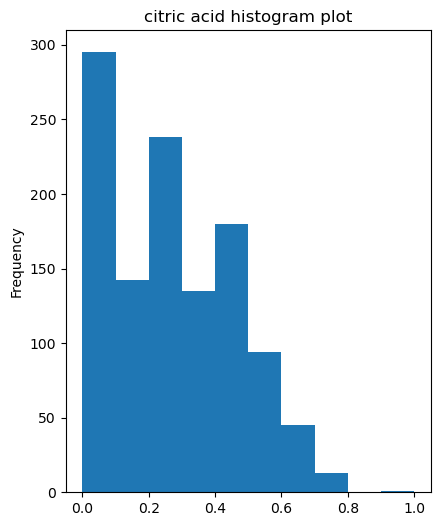

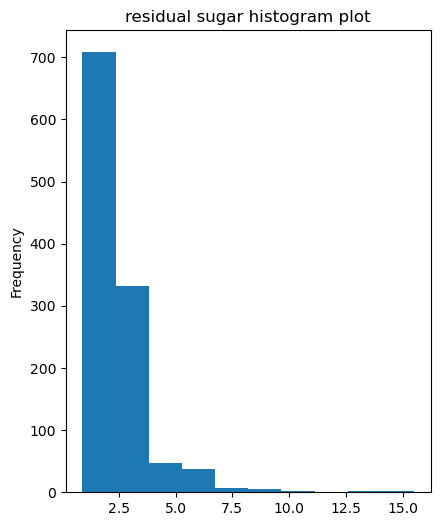

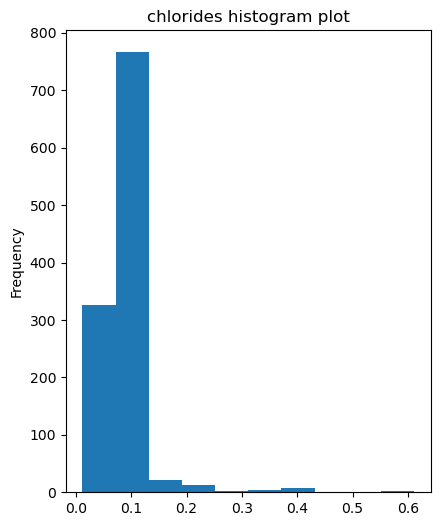

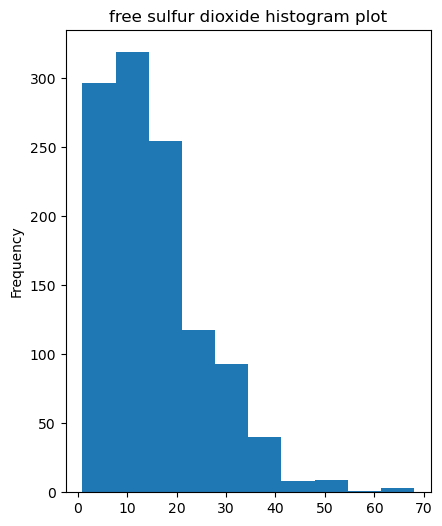

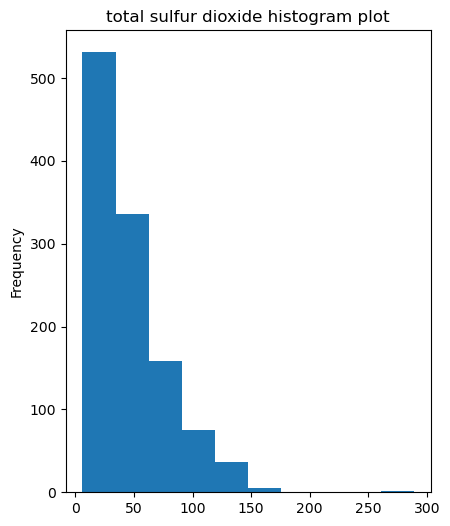

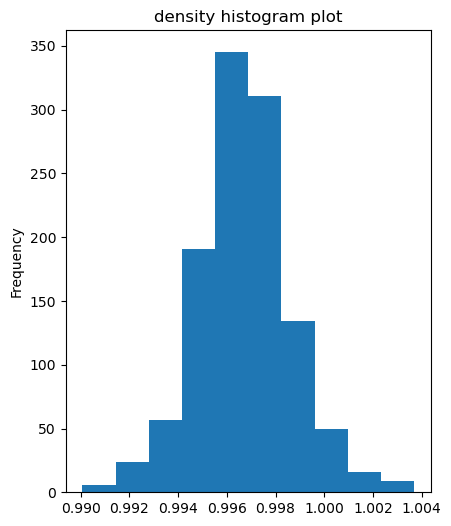

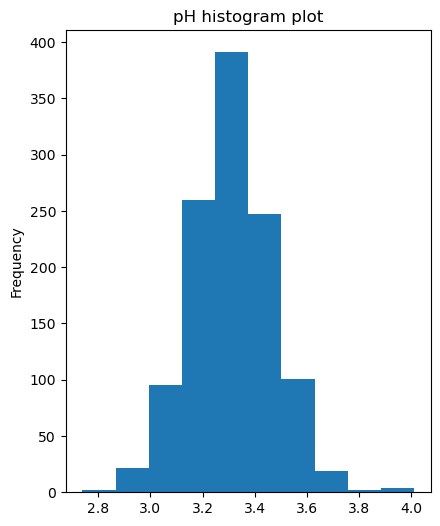

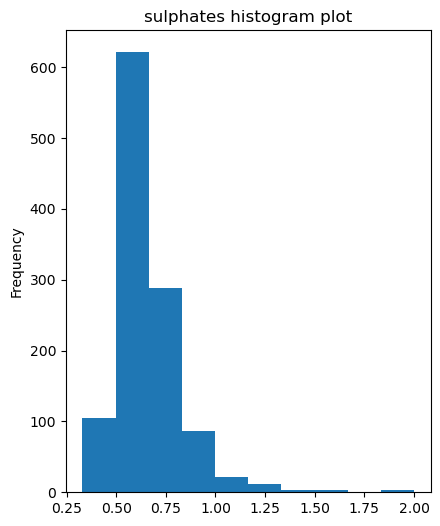

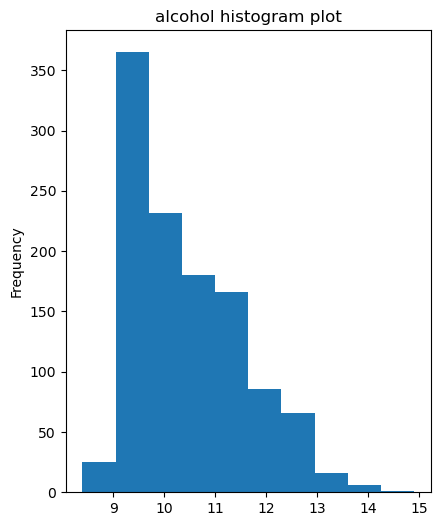

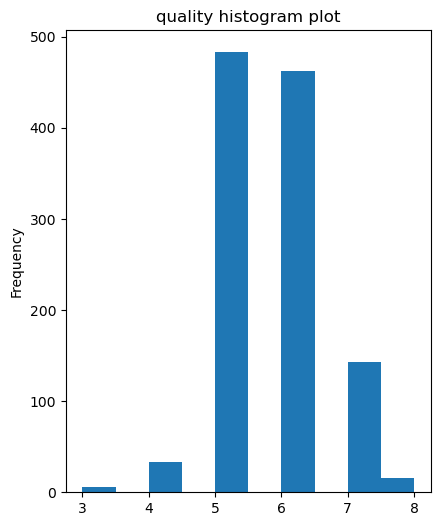

In [85]:
import warnings
warnings.filterwarnings('ignore')

def plot_col(col):
    plt.figure(figsize=(16, 6))
    plt.subplot(1, 3, 1)
    col.plot(kind = 'hist')
    plt.title(f'{col.name} histogram plot')

for i in df.columns:
    plot_col(df[i])

In [86]:
X = df.drop('quality', axis = 1)
y = df['quality']

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((914, 11), (229, 11), (914,), (229,))

In [88]:
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "CatBoost Classifier": CatBoostClassifier(verbose=False)
}

scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores[name] = score
    print(f"{name}: {score}")

Logistic Regression: 0.5633187772925764
K-Neighbors Classifier: 0.47161572052401746
Random Forest Classifier: 0.6331877729257642
CatBoost Classifier: 0.6724890829694323


In [89]:
cb = CatBoostClassifier()
cb.fit(X_train, y_train)

Learning rate set to 0.078765
0:	learn: 1.6851274	total: 2.97ms	remaining: 2.96s
1:	learn: 1.6003371	total: 5.62ms	remaining: 2.8s
2:	learn: 1.5279092	total: 8.35ms	remaining: 2.77s
3:	learn: 1.4687388	total: 10.8ms	remaining: 2.7s
4:	learn: 1.4145878	total: 13.6ms	remaining: 2.7s
5:	learn: 1.3655901	total: 16.1ms	remaining: 2.67s
6:	learn: 1.3167745	total: 18.9ms	remaining: 2.67s
7:	learn: 1.2766487	total: 21.4ms	remaining: 2.65s
8:	learn: 1.2411722	total: 23.9ms	remaining: 2.63s
9:	learn: 1.2075901	total: 26.7ms	remaining: 2.64s
10:	learn: 1.1808473	total: 29.2ms	remaining: 2.63s
11:	learn: 1.1519868	total: 31.7ms	remaining: 2.61s
12:	learn: 1.1268118	total: 34.3ms	remaining: 2.6s
13:	learn: 1.1041102	total: 36.7ms	remaining: 2.59s
14:	learn: 1.0839342	total: 39.2ms	remaining: 2.58s
15:	learn: 1.0664707	total: 41.9ms	remaining: 2.58s
16:	learn: 1.0476446	total: 44.5ms	remaining: 2.57s
17:	learn: 1.0307347	total: 47ms	remaining: 2.56s
18:	learn: 1.0149888	total: 49.5ms	remaining: 2.55

221:	learn: 0.4334493	total: 567ms	remaining: 1.99s
222:	learn: 0.4318296	total: 570ms	remaining: 1.98s
223:	learn: 0.4305802	total: 572ms	remaining: 1.98s
224:	learn: 0.4290859	total: 575ms	remaining: 1.98s
225:	learn: 0.4272706	total: 577ms	remaining: 1.98s
226:	learn: 0.4262959	total: 580ms	remaining: 1.97s
227:	learn: 0.4247750	total: 582ms	remaining: 1.97s
228:	learn: 0.4242116	total: 585ms	remaining: 1.97s
229:	learn: 0.4230914	total: 587ms	remaining: 1.97s
230:	learn: 0.4223048	total: 590ms	remaining: 1.96s
231:	learn: 0.4220158	total: 592ms	remaining: 1.96s
232:	learn: 0.4207468	total: 595ms	remaining: 1.96s
233:	learn: 0.4194920	total: 597ms	remaining: 1.96s
234:	learn: 0.4187318	total: 600ms	remaining: 1.95s
235:	learn: 0.4165026	total: 603ms	remaining: 1.95s
236:	learn: 0.4147202	total: 605ms	remaining: 1.95s
237:	learn: 0.4136939	total: 608ms	remaining: 1.95s
238:	learn: 0.4124864	total: 610ms	remaining: 1.94s
239:	learn: 0.4116004	total: 613ms	remaining: 1.94s
240:	learn: 

379:	learn: 0.2786293	total: 970ms	remaining: 1.58s
380:	learn: 0.2780057	total: 973ms	remaining: 1.58s
381:	learn: 0.2771999	total: 976ms	remaining: 1.58s
382:	learn: 0.2763332	total: 978ms	remaining: 1.57s
383:	learn: 0.2754929	total: 981ms	remaining: 1.57s
384:	learn: 0.2751296	total: 983ms	remaining: 1.57s
385:	learn: 0.2744569	total: 986ms	remaining: 1.57s
386:	learn: 0.2739778	total: 988ms	remaining: 1.56s
387:	learn: 0.2730744	total: 991ms	remaining: 1.56s
388:	learn: 0.2724836	total: 993ms	remaining: 1.56s
389:	learn: 0.2721434	total: 996ms	remaining: 1.56s
390:	learn: 0.2712660	total: 998ms	remaining: 1.55s
391:	learn: 0.2700699	total: 1s	remaining: 1.55s
392:	learn: 0.2694623	total: 1s	remaining: 1.55s
393:	learn: 0.2689535	total: 1.01s	remaining: 1.55s
394:	learn: 0.2686009	total: 1.01s	remaining: 1.54s
395:	learn: 0.2678744	total: 1.01s	remaining: 1.54s
396:	learn: 0.2675455	total: 1.01s	remaining: 1.54s
397:	learn: 0.2668105	total: 1.02s	remaining: 1.54s
398:	learn: 0.2663

538:	learn: 0.1893740	total: 1.38s	remaining: 1.18s
539:	learn: 0.1892165	total: 1.38s	remaining: 1.18s
540:	learn: 0.1887654	total: 1.38s	remaining: 1.17s
541:	learn: 0.1886316	total: 1.39s	remaining: 1.17s
542:	learn: 0.1880289	total: 1.39s	remaining: 1.17s
543:	learn: 0.1875913	total: 1.39s	remaining: 1.17s
544:	learn: 0.1871638	total: 1.39s	remaining: 1.16s
545:	learn: 0.1868312	total: 1.4s	remaining: 1.16s
546:	learn: 0.1866764	total: 1.4s	remaining: 1.16s
547:	learn: 0.1859092	total: 1.4s	remaining: 1.16s
548:	learn: 0.1853154	total: 1.4s	remaining: 1.15s
549:	learn: 0.1850183	total: 1.41s	remaining: 1.15s
550:	learn: 0.1846625	total: 1.41s	remaining: 1.15s
551:	learn: 0.1837645	total: 1.41s	remaining: 1.15s
552:	learn: 0.1834299	total: 1.41s	remaining: 1.14s
553:	learn: 0.1832268	total: 1.42s	remaining: 1.14s
554:	learn: 0.1828372	total: 1.42s	remaining: 1.14s
555:	learn: 0.1826987	total: 1.42s	remaining: 1.14s
556:	learn: 0.1824220	total: 1.42s	remaining: 1.13s
557:	learn: 0.18

774:	learn: 0.1231854	total: 1.98s	remaining: 575ms
775:	learn: 0.1230301	total: 1.98s	remaining: 573ms
776:	learn: 0.1227278	total: 1.99s	remaining: 570ms
777:	learn: 0.1223743	total: 1.99s	remaining: 568ms
778:	learn: 0.1221444	total: 1.99s	remaining: 565ms
779:	learn: 0.1219891	total: 1.99s	remaining: 563ms
780:	learn: 0.1218045	total: 2s	remaining: 560ms
781:	learn: 0.1215021	total: 2s	remaining: 557ms
782:	learn: 0.1212725	total: 2s	remaining: 555ms
783:	learn: 0.1210396	total: 2s	remaining: 552ms
784:	learn: 0.1208211	total: 2.01s	remaining: 550ms
785:	learn: 0.1206605	total: 2.01s	remaining: 547ms
786:	learn: 0.1203123	total: 2.01s	remaining: 545ms
787:	learn: 0.1201621	total: 2.01s	remaining: 542ms
788:	learn: 0.1200184	total: 2.02s	remaining: 539ms
789:	learn: 0.1198212	total: 2.02s	remaining: 537ms
790:	learn: 0.1197073	total: 2.02s	remaining: 534ms
791:	learn: 0.1195429	total: 2.02s	remaining: 532ms
792:	learn: 0.1194340	total: 2.03s	remaining: 529ms
793:	learn: 0.1192081	to

In [90]:
y_pred = cb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         8
           5       0.71      0.82      0.76        98
           6       0.66      0.66      0.66        92
           7       0.54      0.52      0.53        25
           8       0.00      0.00      0.00         6

    accuracy                           0.67       229
   macro avg       0.38      0.40      0.39       229
weighted avg       0.63      0.67      0.65       229



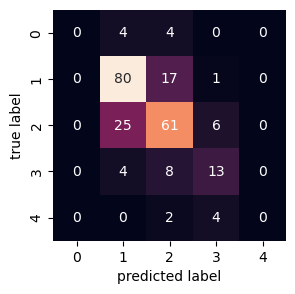

In [91]:
fig, ax = plt.subplots(figsize=(3, 3))
ax = sns.heatmap(confusion_matrix(y_test, y_pred),
                    annot=True,
                    cbar=False)
plt.xlabel("predicted label")
plt.ylabel("true label");